# 2 Qubit Entanglement Visualization with Torus Model
The following code generates:<br/>
1) the Bloch Circle visualization for a single qubit state <br/>
2) the Torus visualziation for a seperable two qubit state <br/>

Prerequisite: 
Python3, qutip, numpy, matplotlib

The versions used by the author are:<br/>
Python 3.8.3<br/>
qutip 4.5.0<br/>
matplotlib 3.1.3 <br/>
numpy 1.18.1

In [1]:
%matplotlib notebook
# enables interactive rotation for plots
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from qutip import *
import cmath # math for complex numbers 
from matplotlib.patches import Circle
from matplotlib.patches import Arrow
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from matplotlib import cm
import mpl_toolkits.mplot3d.art3d as art3d

The following cell is code for visualizing the Bloch sphere for a 1-qubit state. 

In [2]:
def bloch2D(r, theta):
    # input theta in radians in (-180 to 180 degrees) for a single qubit state visualization
    # theta is the angle moving away clockwise from the vertical axis in the bloch sphere/ 
    # the qubit state is characterised by prob amplitutes a = cos(theta/2) and b = sin(theta/2)
    
    # radius of the Block sphere
    R = 0.5
    
    # generates the vector of the qubit state
    half_t = theta/2
    a = np.cos(half_t)
    b = np.sin(half_t)
    q = np.array([[a],[b]])
    Q = Qobj(q) 
    M = Q*Q.dag()
    # print(M)

    # generates the coordinates on the bloch sphere
    t = -theta + np.pi/2
    x = r*np.cos(t)
    y = r*np.sin(t)

#     print("This is the vector representaiton of the pure state: ",Q,"\n\n\n")
#     print("This is the density matrix representaiton of the pure state: ", M,"\n\n\n")

    # define lines in the bloch sphere
    state_arrow = Arrow(x=0, dx=x, y=0, dy=y, width = 0.05)
    a_line =  Line2D(xdata=[0,x], ydata=[-R,y], color ='g')
    b_line =  Line2D(xdata=[0,x], ydata=[R,y] , color ='r')
    c_line =  Line2D(xdata=[0,x], ydata=[y,y] , color ='y')
    a2_line = Line2D(xdata=[0,0], ydata=[y,R] , color ='r') # a squared
    b2_line = Line2D(xdata=[0,0], ydata=[y,-R], color ='g') # b squared
    
    # background lines
    c = Circle(xy = (0,0), radius=R, fill= False)
    small_c = Circle(xy = (0,0), radius=r, fill= False, color = 'blue')
    
    list_artist = [c, small_c, a_line, b_line, c_line, a2_line, b2_line,  state_arrow]
    
    # plot out 
    fig, ax = plt.subplots()
    ax.set_xlim([-R, R])
    ax.set_ylim([-R, R])
    ax.axis('off')
    ax.scatter([x], [y], marker='o', s=50, c ='blue')
    fig.set_size_inches(5, 5)
    for item in list_artist:
        ax.add_artist(item)
    ax.set_aspect('equal', adjustable='box')
    ax.plot()
    
def dm_arguments(Q):
    # input Q is a Qobj representing a density matrix
    # retunrns radius r, theta, azimuthal angle phi (angles in radians)  
    phi = cmath.phase(Q.full()[0][0]) # extract the phase
    Q = Q/cmath.exp(1.j*phi) # keep only real part by dividing off the phase
    L, E = Q.eigenstates() # the lists of eigenvalues(L) and eigenstates(E) 
    r = abs(abs(L[1]) - abs(L[0]))/2  # extract r using Q's eigenvalues
    # extract theta from the real parts of the elements in the eigenvectors
    theta = -2*np.arctan2(E[0].full()[0][0].real, E[0].full()[1][0].real)
    return r, theta, phi 

def dm_bloch2D(Q):
    # input Q is a Qobj representing a density matrix
    # the output will be a bloch circle visualization
    r, theta, phi = dm_arguments(Q)
    bloch2D(r,theta)

In [3]:
# check proper density matrix with error message 
def is_proper2by2dm(Q):
    """
    Checks whether a Qobj() is a proper density matrix. 
    """
    # trace add up to 1
    if Q.tr() != 1: 
        print("Trace is not equal to one.")
        print(Q.tr())
        return False

    # off diagonal elements should be each others conjugate
    if Q.full()[0][1] != Q.full()[1][0].conjugate():
        print("Off diagonal elements are not complex conjugates of each other.")
        return False
    
    # the product of off diagonal elements should be <= the product of diagonal elements
    if Q.full()[0][1]*Q.full()[1][0] > Q.full()[0][0]*Q.full()[1][1]:
        print("The product of off diagonal elements are larger than that of the diagnoal elements.")
        return False
    print("This is a proper density matrix.")
    return True

def rotate(Q, theta):
    # rotates a state on the Bloch sphere clockwise by theta degrees 
    # Q is the Qbj density matrix representation of the state 
    half_t = theta/2
    R = Qobj([[np.cos(half_t), -np.sin(half_t)], [np.sin(half_t), np.cos(half_t)]]) # rotation operator
    return R*Q*R.trans()

<IPython.core.display.Javascript object>


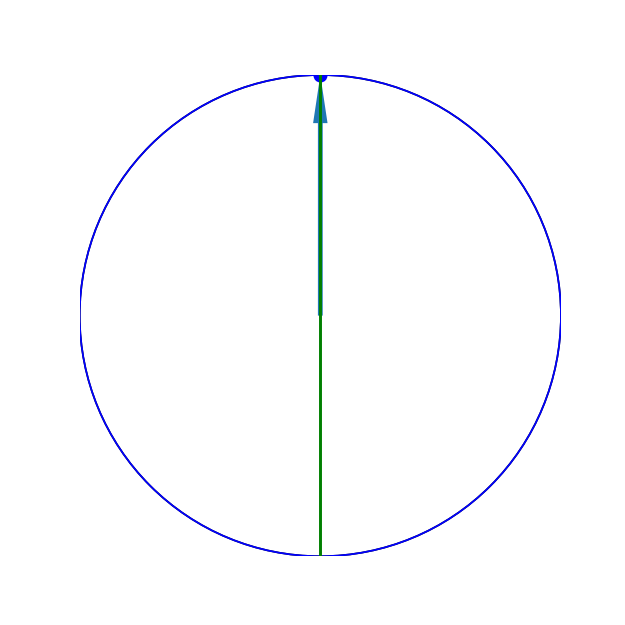

<IPython.core.display.Javascript object>


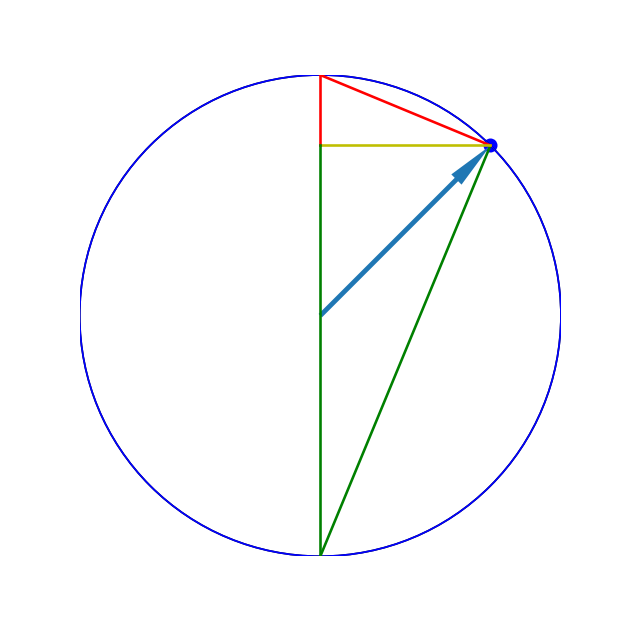

In [4]:
A = Qobj([[1,0],[0,0]])
C = rotate(A,np.pi/4)
dm_bloch2D(A)
dm_bloch2D(C)

In [5]:
A = Qobj([[0.7,1-2.j],[1+2.j,0.3]])
B = coherent_dm(2, 1.25)
is_proper2by2dm(A)
is_proper2by2dm(B)

The product of off diagonal elements are larger than that of the diagnoal elements.
This is a proper density matrix.


True

In [6]:
# generate impure states 
def generate_2by2_dm(r, theta, phi):
    """
    This methods returns a general 2by2 density matrix representing a 1 qubit state. 
    r is the radius of the state. 
    theta is the azimuthal angle.
    phi is the argument of the phase. 
    """
    p0 = 0.5 + r
    p1 = 0.5 - r
    Q = Qobj([[p0,0],[0,p1]])
    Q = rotate(Q, theta)
    return Q 

Now we move on to the 2-qubit case. 

<IPython.core.display.Javascript object>


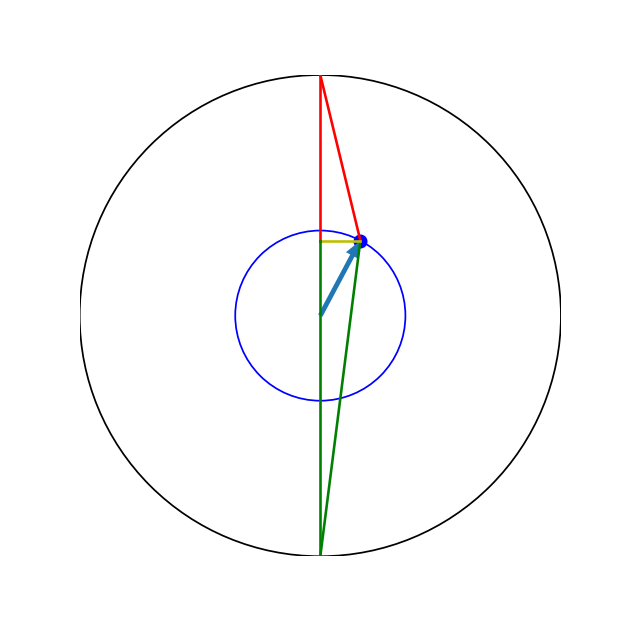

<IPython.core.display.Javascript object>


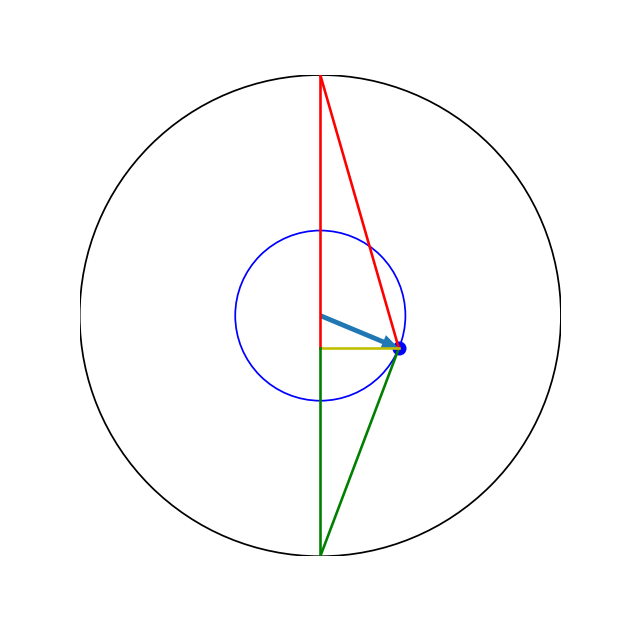

In [7]:
# some example 2 qubit states
Pure = tensor(basis(2, 0), basis(2, 1))
Pure2 = tensor( 0.8*basis(2, 0) + 0.2*basis(2, 1), 0.4*basis(2, 0) + 0.6*basis(2, 1)              )
Mixed = tensor(Qobj([ [0.5],[0], [0],[0.5] ]), Qobj([ [0.5],[0],[0],[0.5] ]) )
Mixed2 = tensor(Qobj([ [0],[0.5], [0.5],[0] ]), Qobj([ [0],[0.5],[0.5],[0] ]) )

# two qubit state
psi = Pure2

# density matrix representation
psi_dm = psi*psi.dag()

#the composite states
q1 = psi.ptrace(0)
q2 = psi.ptrace(1)

dm_bloch2D(q1)
dm_bloch2D(q2)


In [8]:
def torus_crosssection(k, theta):
    '''
    Using the circular cross section of a torus, represent the state of one of the qubit in a 2 qubit system.
    input:
      the k paramter is the radial distance the state is from the pure state shell
      sign is the sign of the parameter k calculated by k = sqrt(.5**2 - r**2)
      theta in radians btn (-pi and pi) is the angle moving away clockwise from the vertical axis 
    '''
    # seperable states is the ring with radius R = 1 on the cross section
    R = 1
    
    # on the plot, the radius of a mixed state can either go radially k inward or outward from R
    r = R + k 
    
    # generates the coordinates on the bloch sphere
    t = -theta + np.pi/2
    x = r*np.cos(t)
    y = r*np.sin(t)

    # define lines in the bloch sphere
    state_arrow = Arrow(x=np.cos(t), dx=k*np.cos(t), y=np.sin(t), dy=k*np.sin(t), width = 0.1)
    a_line =  Line2D(xdata=[0,x], ydata=[-R,y], color ='g')
    b_line =  Line2D(xdata=[0,x], ydata=[R,y] , color ='r')
    c_line =  Line2D(xdata=[0,x], ydata=[y,y] , color ='y')
    a2_line = Line2D(xdata=[0,0], ydata=[y,R] , color ='r') # a squared
    b2_line = Line2D(xdata=[0,0], ydata=[y,-R], color ='g') # b squared
    
    # background circles
    c = Circle(xy = (0,0), radius=R, fill= False)
    pure_c = Circle(xy = (0,0), radius=R, fill= False, color = 'black', linewidth = 3)
    inner_mixed_c = Circle(xy = (0,0), radius=R-0.5, fill= False, color = 'blue', linestyle ="--")
    outer_mixed_c = Circle(xy = (0,0), radius=R+0.5, fill= False, color = 'blue', linestyle ="--")
    list_artist = [pure_c, inner_mixed_c, outer_mixed_c, state_arrow]
    
    # plot out 
    fig, ax = plt.subplots()
    ax.set_xlim([-R-0.5, R+0.5])
    ax.set_ylim([-R-0.5, R+0.5])
    ax.axis('off')
    ax.scatter([x], [y], marker='o', s=50, c ='blue')
    fig.set_size_inches(5, 5)
    for item in list_artist:
        ax.add_artist(item)
    ax.set_aspect('equal', adjustable='box')
    ax.plot()

<IPython.core.display.Javascript object>


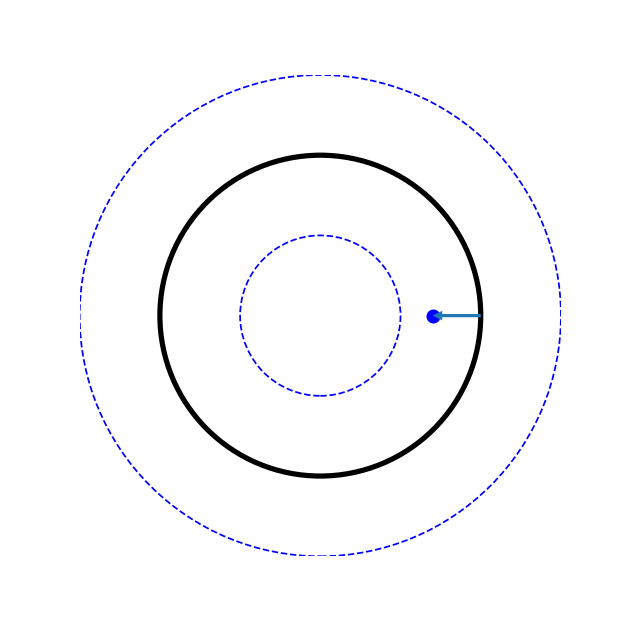

<IPython.core.display.Javascript object>


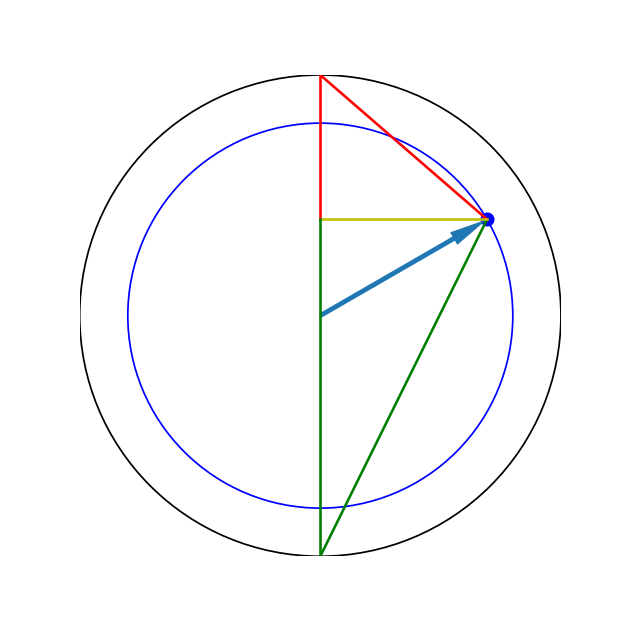

In [9]:
k = -0.3
theta = np.pi/2
phi = np.pi/3
r = np.sqrt(0.25-k**2)
# cross section view of the torus 
torus_crosssection(k, theta)

# top view of the torus/ horizontal slice 
bloch2D(r, phi)


In [10]:
def rotation_matrix(d):
    """
    Calculates a rotation matrix given a vector d. The direction of d
    corresponds to the rotation axis. The length of d corresponds to 
    the sin of the angle of rotation.

    Variant of: http://mail.scipy.org/pipermail/numpy-discussion/2009-March/040806.html
    """
    sin_angle = np.linalg.norm(d)

    if sin_angle == 0:
        return np.identity(3)

    d /= sin_angle
    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[    0,  d[2],  -d[1]],
                  [-d[2],     0,  d[0]],
                  [d[1], -d[0],    0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M

def pathpatch_2d_to_3d(pathpatch, z = 0, normal = 'z'):
    """
    Transforms a 2D Patch to a 3D patch using the given normal vector.

    The patch is projected into they XY plane, rotated about the origin
    and finally translated by z.
    """
    if type(normal) is str: #Translate strings to normal vectors
        index = "xyz".index(normal)
        normal = np.roll((1.0,0,0), index)

    normal /= np.linalg.norm(normal) #Make sure the vector is normalised

    path = pathpatch.get_path() #Get the path and the associated transform
    trans = pathpatch.get_patch_transform()

    path = trans.transform_path(path) #Apply the transform

    pathpatch.__class__ = art3d.PathPatch3D #Change the class
    pathpatch._code3d = path.codes #Copy the codes
    pathpatch._facecolor3d = pathpatch.get_facecolor #Get the face color    

    verts = path.vertices #Get the vertices in 2D

    d = np.cross(normal, (0, 0, 1)) #Obtain the rotation vector    
    M = rotation_matrix(d) #Get the rotation matrix
    pathpatch._segment3d = np.array([np.dot(M, (x, y, 0)) + (0, 0, z) for x, y in verts])
    
def torus_2q(r, t1, t2):
    '''
    Plots a two qubit state with 3 params specified. 
    t1 is the angle of the 1st qubit on the bloch circle.
    t2 is the angle of the 2nd qubit on the bloch circle.
    r is the radius of both qubits on the bloch circle. 
    the sign of r specifies wether the state is on the inside of the torus (-1) or outside (1)
    
    Reference for displaying 2d artists in 3d:
    https://stackoverflow.com/questions/18228966/how-can-matplotlib-2d-patches-be-transformed-to-3d-with-arbitrary-normals
    '''
    t2 = -t2 + np.pi/2
    k = np.sqrt(.5**2-r**2)
    fig = plt.figure(figsize=(8,8))
    
    # plot configurations
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('z axis')
    a = 1 # the radius of the cross section
    b = 2 # the radius of the donut hole
    ax.set_xlim(-(a+b),a+b)
    ax.set_ylim(-(a+b),a+b)
    ax.set_zlim(-(a+b),a+b)
    from matplotlib.colors import LightSource
    ls = LightSource(azdeg=315, altdeg=45)
    n = 100 # number of points to show the torus 
    u = np.linspace(0,2*np.pi,n)
    v = np.linspace(0,2*np.pi,n)
    u,v = np.meshgrid(u,v)
    X, Y, Z = (b + a*np.cos(u)) * np.cos(v), (b + a*np.cos(u)) * np.sin(v), a * np.sin(u)
    OX, OY, OZ = (b + (a+0.5)*np.cos(u)) * np.cos(v), (b + (a+0.5)*np.cos(u)) * np.sin(v), (a+0.5)*np.sin(u)
    IX, IY, IZ = (b + (a-0.5)*np.cos(u)) * np.cos(v), (b + (a-0.5)*np.cos(u)) * np.sin(v), (a-0.5)*np.sin(u)
    # plot the torus grids
    # ax.plot_surface(X, Y, Z, alpha=0.2, rstride=12, cstride=12, color='w', edgecolors='black', linewidth=0.5)
    # plot the torus 
    ax.plot_surface(X, Y, Z, alpha=0.3, cmap = cm.Wistia) # ocean, prism, cool, Wistia
    ax.plot_wireframe(OX, OY, OZ, alpha=0.1) # ocean, prism, cool, Wistia
    ax.plot_surface(IX, IY, IZ, alpha=1, cmap = cm.gray) # ocean, prism, cool, Wistia
    
    # show torus knot for max mixed states
    if abs(r) <= 0.001:
        print("k", k)
        nv = np.linspace(0, 2*np.pi,n)
        offset = np.full(n, t2-t1+np.pi/2) 
        nu = nv + offset 
        print(nv[0], nu[0])
        print(nv[0], nu[0])
        PX = (b + (a+k)*np.cos(nu)) * np.cos(nv)
        PY = (b + (a+k)*np.cos(nu)) * np.sin(nv)
        PZ = (a+k)*np.sin(nu)
        ax.scatter(PX, PY, PZ, marker='o')
    
    # the circular grid lines for marking the bases up up/ down down states
    top_ring = Circle( (0,0), b , facecolor = 'black', alpha = 0.7, fill=False, linewidth = 3)
    ax.add_patch(top_ring)
    pathpatch_2d_to_3d(top_ring, z = a)
    
    side_ring = Circle( (b,0), a , facecolor = 'black', alpha = 0.7, fill=False, linewidth = 3)
    ax.add_patch(side_ring)
    pathpatch_2d_to_3d(side_ring, z = 0, normal = [0,1,0])
    block_circle_zaxis = art3d.Line3D( linewidth = 3, xs=[b*np.cos(t1),b*np.cos(t1)], ys=[b*np.sin(t1),b*np.sin(t1)], zs=[0,a])
    
    shapes3D = [block_circle_zaxis]
    for s in shapes3D:
        ax.add_artist(s)
    
    # Draw a circle on the x=0 'wall'
    norm = np.array([-np.sin(t1), np.cos(t1) ,0]) # the norm of the cross section
    x,y = b*np.cos(t1), b*np.sin(t1)
    cross_sect = Circle( (x, y), a+k, facecolor = 'blue', alpha = 0.3)
    cross_sect_boundary = Circle( (x, y), a, edgecolor = 'blue', alpha = 1, fill = False,  linewidth=1, linestyle = '-')
    small_cross_sect_boundary = Circle( (x, y), a-0.5, edgecolor = 'w', alpha = 1, fill = False,  linewidth=2, linestyle = '-')
    large_cross_sect_boundary = Circle( (x, y), a+0.5, edgecolor = 'g', alpha = 1, fill = False,  linewidth=1, linestyle = '-')
    
    
    #state_arrow_k = Arrow(x=x+a*np.cos(t2), dx=k*np.cos(t2), y=y+a*np.sin(t2), dy=k*np.sin(t2), width = 0.3, alpha = 1, color = 'r')
    state_arrow_r = Arrow(x=x+(a+0.5)*np.cos(t2), dx=-r*np.cos(t2), y=y+(a+0.5)*np.sin(t2), dy=-r*np.sin(t2), width = 0.3, alpha = 1, color = 'r')
    shapes2D = [ cross_sect_boundary, cross_sect, small_cross_sect_boundary, large_cross_sect_boundary, state_arrow_r]
    
    if abs(r) >= 0.001:
        #state_arrow2_k = Arrow(x=x+a*np.cos(t2), dx=-k*np.cos(t2), y=y+a*np.sin(t2), dy=-k*np.sin(t2), width = 0.3, alpha = 1, color = 'r')
        state_arrow2_r = Arrow(x=x+(a-0.5)*np.cos(t2), dx=r*np.cos(t2), y=y+(a-0.5)*np.sin(t2), dy=r*np.sin(t2), width = 0.3, alpha = 1, color = 'r')
        shapes2D.append(state_arrow2_r)
    
    for s in shapes2D:
        ax.add_patch(s)
        pathpatch_2d_to_3d(s, z = 0, normal = [np.sin(t1), -np.cos(t1),0])
    plt.show()
    
    

<IPython.core.display.Javascript object>


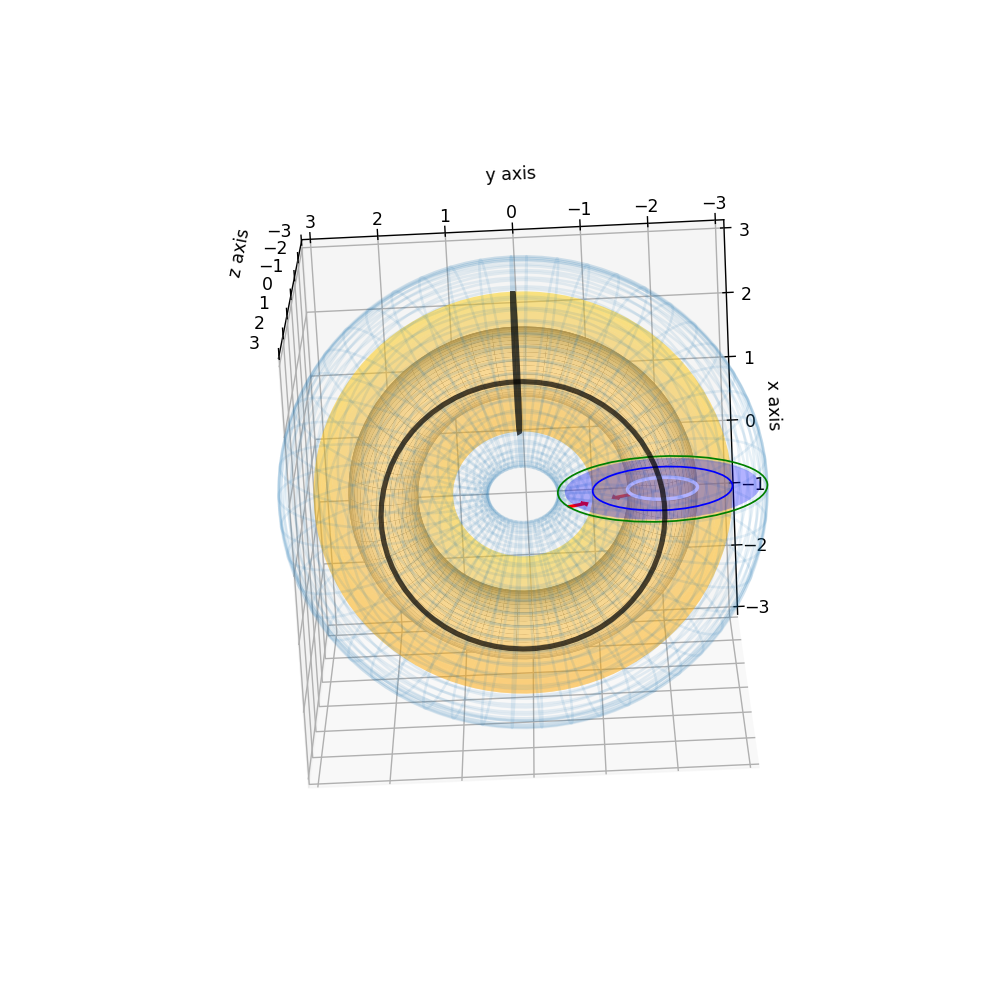

In [11]:
# example plot for the 2d case
r = 0.3
t1 = np.pi*1.5
t2 = np.pi/7
torus_2q(r, t1, t2)

In [12]:
# generation of 2 qubit states

def rotate2Q(t1, t2, Q):
    '''
    Rotates a 2 qubit system
    t1 is the angle in radains to rotate conterclockwise on the 1st qubits bloch cirle
    t2 is the angle in radains to rotate conterclockwise on the 2nd qubits bloch cirle
    Q is the ket representation of the 2 qubit state
    '''
    R1 = np.array([[np.cos(t1/2), -np.sin(t1/2)],[np.sin(t1/2),np.cos(t1/2)]])
    R2 = np.array([[np.cos(t2/2), -np.sin(t2/2)],[np.sin(t2/2),np.cos(t2/2)]])
    R = tensor(Qobj(R1),Qobj(R2))
    a = R.full()[0][0]
    if a == 0: 
        return Qobj(np.matmul(R.full(), Q.full()))
    return Qobj(a/abs(a)*np.matmul(R.full(), Q.full()))


def dm_2Q(t1, t2, r):
    '''
    Returns the density matrix representation 2 qubit system given ket params t1, t2, r. 
    t1 and t2 are the angles of the 2 qubits on the bloch circle. 
    r is their radius on the block circle. 
    '''
    q1 = Qobj([[0.5 + r,0],[0, 0.5 - r]])
    q1 = rotate(q1, t1)
    q2 = Qobj([[0.5 + r,0],[0, 0.5 - r]])
    q2 = rotate(q2, t2)
    return tensor(q1, q2)

def dm_arguments_2q(Q):
    '''
    Extracts r, t1, t2 given Q, a 4x4 density matrix Qobj representing a 2 qubit pure state
    '''
    #the composite states
    q0 = Q.ptrace(0)
    q1 = Q.ptrace(1)    
    r, t1, phi1 = dm_arguments(q0)
#     print("1st r found ", r , "with arguemets", t1, phi1)
    r1, t2, phi2 = dm_arguments(q1)
#     print("2nd r found ", r1, "with arguemets", t2, phi2)
    return min(r,r1), (t1+np.pi*2)%(np.pi*2), (t2+np.pi*2)%(np.pi*2)


In [13]:
# example for rotate2Q
Q  = Qobj([[1],[0],[0],[1]]/np.sqrt(2))
t1 = np.pi*1/2
Q  = rotate2Q(t1, 0, Q)
print(Q)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.5]
 [-0.5]
 [ 0.5]
 [ 0.5]]


In [14]:
# check that generating 2Q states is consistent with extracting arguments 
t1 = np.pi/4
t2 = -np.pi/2
r = 0.3
Q = dm_2Q(t1, t2, r)
print(r,t1,t2)
print(dm_arguments_2q(Q))

0.3 0.7853981633974483 -1.5707963267948966
(0.30000000000000004, 0.7853981633974483, 4.71238898038469)


In [15]:
from sympy import symbols, Eq, solve
from sympy.abc import x
def dm2ket_2Q(Q):
    '''
    Returns the ket representation of a SEPERABLE 2 qubit state given its density matrix. 
    The input Q has to be a SEPERABLE state. 
    '''
    #the composite states
    q0 = Q.ptrace(0)
    q1 = Q.ptrace(1)
    
    A = q0.full()[0][0]
    B = q0.full()[0][1]
    D = q1.full()[0][0]
    F = q1.full()[1][1]
    
    # solve the equation X*a^2 + Y = +-2aB*sqrt(D-A^2)
    X = 1-2*A
    Y = A**2 + A*D + B**2 - A
    
    # solve the quation P*a^4 + Q*a^2 + R = 0  
    P = X**2 + 4*B**2
    Q = 2*X*Y - 4*(B**2)*D
    R = Y**2
    
    # a values 
    delta = np.sqrt(Q**2-4*R*P)
    a = np.sqrt((-Q + delta)/(2*P))
    if delta >= 0.0001:
        print("delta is big: ", delta)
        a_n = np.sqrt((-Q - delta)/(2*P))
        print("got 2 possible a values: ", a , a_n) 
    c = np.sqrt(A-a**2)
    d = np.sqrt(D-a**2)
    b = np.sqrt(F-c**2) 
    return np.array([[a],[c],[d],[b]])
        

In [16]:
# the two qubit state
#c = [1,0,0,0]
#c = [0,1,0,0]
#c = [0,0,1,0]
#c = [0,0,0,1]
# c = [0.5]*4
c = [0, np.sqrt(0.5), np.sqrt(0.5), 0]
#c = [ np.sqrt(0.5),0,0, np.sqrt(0.5)]

Q = c[0]*tensor(basis(2, 0),basis(2, 0)) + \
    c[1]*tensor(basis(2, 0),basis(2, 1)) + \
    c[2]*tensor(basis(2, 1),basis(2, 0)) + \
    c[3]*tensor(basis(2, 1),basis(2, 1))
# print(Q)

P = Qobj(dm2ket_2Q(Q))
print("solution found analytically is : ") 
print(P)
#print(ket2dm(P))

solution found analytically is : 
Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]


In [17]:
#The following commented code is an alternative solution for finding a using the math solution package. 
# # density matrix for composite states
# q0 = Q.ptrace(0)
# q1 = Q.ptrace(1)

# A = q0.full()[0][0] 
# B = q0.full()[0][1]
# D = q1.full()[1][1]
# print("Matrix elements are: ", A, B, D)

# # the x here is the a in our 4x1 vector representing the 2 qubit state
# eq1 = Eq( ((1-2*A)*(x**2) + (A**2 + A*D + B**2 -A))**2 - 2*x*B*(D-x**2), 0)
# sol = solve(eq1)
# print('\n\n')

# sols = []
# for i in sol: 
#     if i.evalf() > 0:
#         a = float(i.evalf())
#         c = np.sqrt(A-a**2)
#         d = np.sqrt(D-a**2)
#         b = 0
#         if c!=0:
#             b = (B-a*d)/c
#         sols = np.array([[a],[c],[d],[b]])
#         print("Solution found by package : ", sols)

# P = Qobj(sols)
# print("solution found analytically is : ", sols)

In [18]:
upup     =  tensor(basis(2,0),basis(2,0))
updown   =  tensor(basis(2,0),basis(2,1))
downup   =  tensor(basis(2,1),basis(2,0))
downdown =  tensor(basis(2,1),basis(2,1))

upup = upup * upup.dag()
updown = updown * updown.dag()
downup = downup * downup.dag()
downdown = downdown * downdown.dag()

dm_arguments_2q(upup)

(0.5, 0.0, 0.0)

In [19]:
for i in np.linspace(0,1, 11):
    comb = upup*(i) + updown*(1-i)   
#     print(comb)
#     print(comb.ptrace(0))
#     print(comb.ptrace(1))
#     print("combinations of %.1f %.1f" % (i, 1-i) )
    r, t1, t2 = dm_arguments_2q(comb)
    s = np.sqrt(.25-r*r)
    print( "%.2f %.2f %.2f " % (s, t1, t2))


0.00 0.00 3.14 
0.30 0.00 3.14 
0.40 0.00 3.14 
0.46 0.00 3.14 
0.49 0.00 3.14 
0.50 0.00 3.14 
0.49 0.00 0.00 
0.46 0.00 0.00 
0.40 0.00 0.00 
0.30 0.00 0.00 
0.00 0.00 0.00 


In [20]:
for i in np.linspace(0,1, 11):
    comb = updown*(i) + downup*(1-i)
    print( "r=%.2f t1=%.2f t2=%.2f " % dm_arguments_2q(comb))

r=0.50 t1=3.14 t2=0.00 
r=0.40 t1=3.14 t2=0.00 
r=0.30 t1=3.14 t2=0.00 
r=0.20 t1=3.14 t2=0.00 
r=0.10 t1=3.14 t2=0.00 
r=0.00 t1=3.14 t2=3.14 
r=0.10 t1=0.00 t2=3.14 
r=0.20 t1=0.00 t2=3.14 
r=0.30 t1=0.00 t2=3.14 
r=0.40 t1=0.00 t2=3.14 
r=0.50 t1=0.00 t2=3.14 
